In [50]:
import csv
from datetime import date
import pickle
import calendar
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def extract_data_from_csv(csv_name):
    payment_list_header = []
    with open(f'{csv_name}.csv', newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            payment_list_header.append(row)
    return payment_list_header[1:]

In [52]:
payment_list= extract_data_from_csv("Chase1131_Activity20220909_20221008_20240417")

In [53]:
payment_list

[['10/06/2022',
  '10/07/2022',
  'RACEWIRE.COM',
  'Gifts & Donations',
  'Sale',
  '-28.45',
  ''],
 ['10/02/2022',
  '10/02/2022',
  'Payment Thank You-Mobile',
  '',
  'Payment',
  '525.69',
  ''],
 ['09/30/2022',
  '10/02/2022',
  'TAYLOR RENTAL WELL SVSTR',
  'Home',
  'Sale',
  '-49.00',
  ''],
 ['09/22/2022',
  '09/25/2022',
  'RED SOX TICKETS',
  'Entertainment',
  'Sale',
  '-48.50',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'AMK MUSIC HALL CONCESSION',
  'Food & Drink',
  'Sale',
  '-29.28',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'CRAZY DOUGHS PIZZA',
  'Food & Drink',
  'Sale',
  '-12.04',
  ''],
 ['09/23/2022',
  '09/25/2022',
  'AMK MUSIC HALL CONCESSION',
  'Food & Drink',
  'Sale',
  '-31.72',
  ''],
 ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
 ['09/20/2022',
  '09/20/2022',
  'Spotify USA',
  'Bills & Utilities',
  'Sale',
  '-4.99',
  ''],
 ['09/15/2022',
  '09/18/2022',
  'SHELL OIL 57542442009',
  'Gas',
  'Sale',
  '-27.67',
  '']

In [54]:
def extract_day_of_week(my_date):
    split_date = my_date.split("/")
    year = int(split_date[2])
    month = int(split_date[0])
    day = int(split_date[1])
    return calendar.day_name[date(year, month, day).weekday()]

In [55]:
def spending_by_day_full_info(payment_list):
    day_spend_dict = {}
    for payment in payment_list:
        day_of_week = extract_day_of_week(payment[0])
        #print(day_of_week)
        if day_of_week in day_spend_dict:
            day_spend_dict[day_of_week].append([payment[0],payment[2],payment[3],payment[5]])
        else:
            day_spend_dict[day_of_week] = [payment[0],payment[2],payment[3],payment[5]]
    return day_spend_dict

In [56]:
def spending_by_day(payment_list):
    day_spend_dict = {}
    for payment in payment_list:
        if payment[4] == "Payment":
                continue
        day_of_week = extract_day_of_week(payment[0])
        if day_of_week in day_spend_dict:
                day_spend_dict[day_of_week]+=abs(float(payment[5]))
        else:
            day_spend_dict[day_of_week] = abs(float(payment[5]))
    return day_spend_dict

In [57]:
spending_by_day(payment_list)

{'Thursday': 104.62, 'Friday': 146.79, 'Tuesday': 15.4, 'Saturday': 86.58}

In [58]:
def spending_by_category_full_info(payment_list):
    category_spend_dict = {}
    for payment in payment_list:
        category = payment[3]
        if category in category_spend_dict:
            category_spend_dict[category].append([payment[0],payment[2],payment[5]])
        else:
            category_spend_dict[category] = [payment[0],payment[2],payment[5]]
    return day_spend_dict

In [59]:
def spending_by_category(payment_list):
    category_spend_dict = {}
    for payment in payment_list:
        category = payment[3]
        if category == '':
            category = "Payment"
        if category in category_spend_dict:
            category_spend_dict[category]+= abs(float(payment[5]))
        else:
            category_spend_dict[category] = abs(float(payment[5]))
    return category_spend_dict

In [60]:
spending_by_category(payment_list)

{'Gifts & Donations': 28.45,
 'Payment': 525.69,
 'Home': 49.0,
 'Entertainment': 48.5,
 'Food & Drink': 134.7,
 'Travel': 4.8,
 'Bills & Utilities': 49.86,
 'Gas': 27.67,
 'Health & Wellness': 10.41}

In [61]:
def spending_by_location_full_info(payment_list):
    location_spend_dict = {}
    for payment in payment_list:
        location = payment[2]
        if location in location_spend_dict:
            location_spend_dict[location].append([payment[0],payment[5]])
        else:
            location_spend_dict[location] = [payment[0],payment[5]]
    return location_spend_dict

In [62]:
def spending_by_location(payment_list):
    location_spend_dict = {}
    for payment in payment_list:
        location = payment[2]
        if location in location_spend_dict:
            location_spend_dict[location]+= abs(float(payment[5]))
        else:
            location_spend_dict[location] = abs(float(payment[5]))
    return location_spend_dict

In [63]:
spending_by_location(payment_list)

{'RACEWIRE.COM': 28.45,
 'Payment Thank You-Mobile': 525.69,
 'TAYLOR RENTAL WELL SVSTR': 49.0,
 'RED SOX TICKETS': 48.5,
 'AMK MUSIC HALL CONCESSION': 61.0,
 'CRAZY DOUGHS PIZZA': 12.04,
 'MBTA KENMORE': 4.8,
 'Spotify USA': 4.99,
 'SHELL OIL 57542442009': 27.67,
 'CVS/PHARMACY #00107': 10.41,
 'INSOMNIA COOKIES-STORR': 13.96,
 'BLAZE PIZZA - STORRS': 11.75,
 'POURHOUSE CT LLC': 16.0,
 'COMCAST CABLE COMM': 44.87,
 'FLAT BREADS': 19.95}

In [64]:
#Creating Storage File

def create_new_long_term_file(payment_list):
    storage_file = [payment_list]
    with open('credit_payment_history.pkl','wb') as f:
        pickle.dump(storage_file, f)
    f.close()

In [65]:
def open_long_term_file():
    with open('credit_payment_history.pkl', 'rb') as f:
        long_term_payment = pickle.load(f)
    f.close()
    return long_term_payment

In [66]:
def update_long_term_file(long_term_payment):
    with open('credit_payment_history.pkl','wb') as f:
        pickle.dump(long_term_payment, f)
    f.close()

In [67]:
def append_to_long_term_list(payment_list,long_term_payment):
    long_term_payment.append(payment_list)

In [68]:
payment_list= extract_data_from_csv("Chase1131_Activity20220909_20221008_20240417")
create_new_long_term_file(payment_list)

In [69]:
long_term_payment = open_long_term_file()

In [70]:
payment_list= extract_data_from_csv("Chase1131_Activity20221009_20221108_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20221109_20221208_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20221209_20230108_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230109_20230208_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230209_20230308_20240418")
append_to_long_term_list(payment_list,long_term_payment)
payment_list= extract_data_from_csv("Chase1131_Activity20230309_20230408_20240418")
append_to_long_term_list(payment_list,long_term_payment)

In [71]:
open_long_term_file()

[[['10/06/2022',
   '10/07/2022',
   'RACEWIRE.COM',
   'Gifts & Donations',
   'Sale',
   '-28.45',
   ''],
  ['10/02/2022',
   '10/02/2022',
   'Payment Thank You-Mobile',
   '',
   'Payment',
   '525.69',
   ''],
  ['09/30/2022',
   '10/02/2022',
   'TAYLOR RENTAL WELL SVSTR',
   'Home',
   'Sale',
   '-49.00',
   ''],
  ['09/22/2022',
   '09/25/2022',
   'RED SOX TICKETS',
   'Entertainment',
   'Sale',
   '-48.50',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-29.28',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'CRAZY DOUGHS PIZZA',
   'Food & Drink',
   'Sale',
   '-12.04',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-31.72',
   ''],
  ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
  ['09/20/2022',
   '09/20/2022',
   'Spotify USA',
   'Bills & Utilities',
   'Sale',
   '-4.99',
   ''],
  ['09/15/2022',
   '09/18/2022',
   '

In [72]:
update_long_term_file(long_term_payment)

In [73]:
long_term_payment = open_long_term_file()
long_term_payment

[[['10/06/2022',
   '10/07/2022',
   'RACEWIRE.COM',
   'Gifts & Donations',
   'Sale',
   '-28.45',
   ''],
  ['10/02/2022',
   '10/02/2022',
   'Payment Thank You-Mobile',
   '',
   'Payment',
   '525.69',
   ''],
  ['09/30/2022',
   '10/02/2022',
   'TAYLOR RENTAL WELL SVSTR',
   'Home',
   'Sale',
   '-49.00',
   ''],
  ['09/22/2022',
   '09/25/2022',
   'RED SOX TICKETS',
   'Entertainment',
   'Sale',
   '-48.50',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-29.28',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'CRAZY DOUGHS PIZZA',
   'Food & Drink',
   'Sale',
   '-12.04',
   ''],
  ['09/23/2022',
   '09/25/2022',
   'AMK MUSIC HALL CONCESSION',
   'Food & Drink',
   'Sale',
   '-31.72',
   ''],
  ['09/23/2022', '09/25/2022', 'MBTA KENMORE', 'Travel', 'Sale', '-4.80', ''],
  ['09/20/2022',
   '09/20/2022',
   'Spotify USA',
   'Bills & Utilities',
   'Sale',
   '-4.99',
   ''],
  ['09/15/2022',
   '09/18/2022',
   '

In [74]:
def avg_spending_by_day_long_term(long_term_payment):
    day_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            if payment[4] == "Payment":
                continue
            day_of_week = extract_day_of_week(payment[0])
            if day_of_week in day_spend_dict:
                day_spend_dict[day_of_week]+=float(payment[5])
            else:
                day_spend_dict[day_of_week] = float(payment[5])
    for day in day_spend_dict:
        day_spend_dict[day] = abs(day_spend_dict[day]/length)
    return day_spend_dict

In [75]:
avg_spending_by_day_long_term(long_term_payment)

{'Monday': 29.071666666666673,
 'Tuesday': 57.544999999999995,
 'Sunday': 48.068333333333335,
 'Friday': 179.52666666666664,
 'Wednesday': 76.34833333333333,
 'Thursday': 76.315,
 'Saturday': 48.97}

In [76]:
def avg_spending_by_category_long_term(long_term_payment):
    category_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            category = payment[3]
            if category == '':
                category = "Payment"
            if category in category_spend_dict:
                category_spend_dict[category]+= abs(float(payment[5]))
            else:
                category_spend_dict[category] = abs(float(payment[5]))
    for cat in category_spend_dict:
        category_spend_dict[cat] = abs(category_spend_dict[cat]/length)
    return category_spend_dict

In [77]:
avg_spending_by_category_long_term(long_term_payment)

{'Food & Drink': 221.19000000000003,
 'Payment': 477.05333333333334,
 'Personal': 16.683333333333334,
 'Shopping': 94.71499999999999,
 'Gas': 22.291666666666668,
 'Entertainment': 35.903333333333336,
 'Bills & Utilities': 57.99666666666667,
 'Health & Wellness': 17.166666666666668,
 'Groceries': 13.101666666666667,
 'Travel': 29.46666666666667,
 'Education': 0.8333333333333334,
 'Fees & Adjustments': 2.1,
 'Gifts & Donations': 4.3966666666666665}

In [78]:
def avg_spending_by_location_long_term(long_term_payment):
    location_spend_dict = {}
    if len(long_term_payment)<=6:
        length = len(long_term_payment)
    else:
        length = 6
    past_6_months_payment = long_term_payment[-6:]
    for month in past_6_months_payment:
        for payment in month:
            location = payment[2]
            if payment[4] == "Payment":
                continue
            if location in location_spend_dict:
                location_spend_dict[location]+= abs(float(payment[5]))
            else:
                location_spend_dict[location] = abs(float(payment[5]))
    for loc in location_spend_dict:
        location_spend_dict[loc] = abs(location_spend_dict[loc]/length)
    return location_spend_dict

In [79]:
avg_spending_by_location_long_term(long_term_payment)

{'FLAT BREADS': 5.165,
 'Brighton Laundry &amp; Dry Cl': 2.9583333333333335,
 'JERSEY MIKES 16026': 12.174999999999999,
 'EAGLESDELI.COM': 11.709999999999999,
 'MICHAELS STORES 1183': 2.775,
 'SHELL OIL 57542442009': 9.618333333333334,
 'MAJESTIC 7 BY CW THEATRES': 10.303333333333335,
 'Spotify USA': 4.990000000000001,
 '7-ELEVEN 35775': 0.73,
 'AMERS DELI.': 1.5683333333333334,
 'THE M DEN  ON CAMPUS': 9.345,
 'TST* NO THAI- SOUTH U': 2.513333333333333,
 'SCOREKEEPERS': 4.833333333333333,
 'NEWSLINK 13 BOS': 0.7283333333333334,
 'CRAZY DOUGHS PIZZA': 1.6916666666666667,
 'COMCAST CABLE COMM': 53.00666666666667,
 '7-ELEVEN 32454': 5.578333333333333,
 'BC CONCESSIONS': 7.666666666666667,
 'THE CORNER DELI': 2.54,
 'CVS/PHARMACY #01889': 8.825000000000001,
 'DECKERS*UGG': 17.16,
 'PASCARELLA BROTHERS': 3.3216666666666668,
 'PRU CNTR LGND CONC CLVR': 3.283333333333333,
 'SUNOCO 0016867401': 6.364999999999999,
 'INSOMNIA COOKIES-STORR': 4.203333333333333,
 'UCONN CONC': 1.8333333333333333,

In [80]:
cat_dict = avg_spending_by_category_long_term(long_term_payment)

def make_category_pie(cat_dict):
    cat_list = cat_dict.keys()
    sum1 = sum(cat_dict.values())
    per_list = [(x/sum1)*100 for x in cat_dict.values()]
    print(per_list)
    print(cat_list)
    #plt.figure(figsize = (10,10))
    fig = plt.figure(figsize=(10,7))
    plt.pie(per_list, labels = cat_list)
    
    
    

[22.277205286207554, 48.0465438724005, 1.680266022536715, 9.539244534938957, 2.245110694448408, 3.6160130526958953, 5.841148556666594, 1.7289450581546617, 1.3195375827333782, 2.9677425852596526, 0.08392937175508067, 0.2115020168228033, 0.4428113653798056]
dict_keys(['Food & Drink', 'Payment', 'Personal', 'Shopping', 'Gas', 'Entertainment', 'Bills & Utilities', 'Health & Wellness', 'Groceries', 'Travel', 'Education', 'Fees & Adjustments', 'Gifts & Donations'])


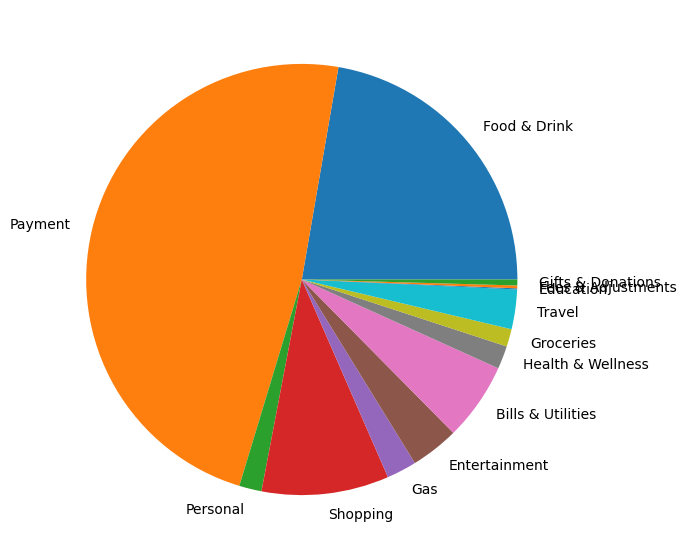

In [81]:
make_category_pie(cat_dict)

dict_keys(['Monday', 'Tuesday', 'Sunday', 'Friday', 'Wednesday', 'Thursday', 'Saturday']) dict_values([29.071666666666673, 57.544999999999995, 48.068333333333335, 179.52666666666664, 76.34833333333333, 76.315, 48.97])


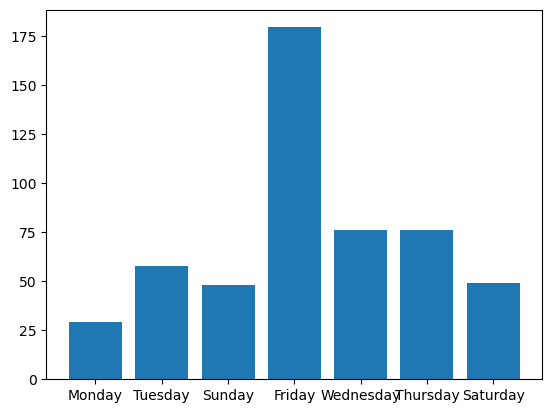

In [90]:
spending_by_day_dict = avg_spending_by_day_long_term(long_term_payment)

def make_dow_bar(dow_dict):
    dow_list = dow_dict.keys()
    amt_list = dow_dict.values()
    print(dow_list, amt_list)

    plt.bar(dow_list, amt_list)
    plt.show()
    
make_dow_bar(spending_by_day_dict)